# Feature Engineering for Pharmaceutical Spending Clustering Analysis

## Strategic Feature Selection and Engineering for Market Entry Strategy Development
**Description:**

This notebook implements a two-phase approach: (1) Feature Selection - using correlation analysis to objectively identify which original metrics (PC_HEALTHXP, PC_GDP, USD_CAP, TOTAL_SPEND) should be retained based on redundancy and relevance to the research question, and (2) Feature Engineering - creating growth rates, averages, volatility metrics, and derived ratios from selected features. The process transforms time-series data into country-level characteristics suitable for clustering and market segmentation analysis.

### Step 1 | Load Cleaned Dataset

In [1]:
# Feature Engineering Notebook
# =============================
# Project: Healthcare Expenditure Clustering Analysis
# Purpose: Feature Selection and Engineering for Market Entry Strategy

# Step 1: Import Libraries and Load Cleaned Dataset
# ==================================================

print("="*70)
print("FEATURE ENGINEERING - PHARMACEUTICAL SPENDING CLUSTERING")
print("="*70)

# 1.1 Import necessary libraries
print("\n1.1 Importing Libraries...")

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")

FEATURE ENGINEERING - PHARMACEUTICAL SPENDING CLUSTERING

1.1 Importing Libraries...
✓ Libraries imported successfully


In [2]:
# 1.2 Load the cleaned dataset
print("\n1.3 Loading Cleaned Dataset...")

file_path = '../Data/processing/cleaned_data_2011_2020.csv'
df = pd.read_csv(file_path)

print(f"✓ Data loaded successfully from: {file_path}")


1.3 Loading Cleaned Dataset...
✓ Data loaded successfully from: ../Data/processing/cleaned_data_2011_2020.csv


In [3]:
# 1.3 List countries in dataset
print("\n1.6 Countries in Dataset:")
countries = sorted(df['COUNTRY'].unique())
print(f"  Total: {len(countries)} countries\n")
for i in range(0, len(countries), 10):
    print("  " + ", ".join(countries[i:i+10]))

# 1.7 Dataset ready confirmation
print("\n" + "="*70)
print("STEP 1 COMPLETED: Dataset Loaded and Verified")
print("="*70)

print(f"""
Dataset Status:
---------------
✓ Loaded: cleaned_data_2011_2020.csv
✓ Records: {len(df)} rows × {df.shape[1]} columns
✓ Countries: {df['COUNTRY'].nunique()}
✓ Time period: {df['YEAR'].min()}-{df['YEAR'].max()}
✓ Completeness: 100% (no missing values)
✓ Quality: No duplicates

Available Features:
-------------------
1. COUNTRY       - Country identifier (3-letter code)
2. YEAR          - Year (2011-2020)
3. PC_HEALTHXP   - Pharmaceutical spending as % of health expenditure
4. PC_GDP        - Health expenditure as % of GDP
5. USD_CAP       - Health spending per capita (USD)
6. TOTAL_SPEND   - Total health spending (million USD)

Next Step: Feature Selection Analysis (Correlation Matrix)
""")


1.6 Countries in Dataset:
  Total: 36 countries

  AUS, AUT, BEL, CAN, CHE, CRI, CYP, CZE, DEU, DNK
  ESP, EST, FIN, FRA, GRC, HRV, HUN, IRL, ISL, ISR
  ITA, JPN, KOR, LTU, LUX, LVA, MEX, NLD, NOR, POL
  PRT, ROU, SVK, SVN, SWE, USA

STEP 1 COMPLETED: Dataset Loaded and Verified

Dataset Status:
---------------
✓ Loaded: cleaned_data_2011_2020.csv
✓ Records: 360 rows × 6 columns
✓ Countries: 36
✓ Time period: 2011-2020
✓ Completeness: 100% (no missing values)
✓ Quality: No duplicates

Available Features:
-------------------
1. COUNTRY       - Country identifier (3-letter code)
2. YEAR          - Year (2011-2020)
3. PC_HEALTHXP   - Pharmaceutical spending as % of health expenditure
4. PC_GDP        - Health expenditure as % of GDP
5. USD_CAP       - Health spending per capita (USD)
6. TOTAL_SPEND   - Total health spending (million USD)

Next Step: Feature Selection Analysis (Correlation Matrix)



------
### Step 2 | Feature Selection- Correlation Analysis
**Description:**

Calculate and visualize the correlation between the four original features to see if any are redundant.

In [4]:
# Step 2: Correlation Analysis
# ============================

print("\n" + "="*70)
print("STEP 2: CORRELATION ANALYSIS")
print("="*70)

# 2.1 Select the features to analyze
print("\n2.1 Features to Analyze:")

features = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
print(f"  {features}")

# 2.2 Calculate correlation matrix
print("\n2.2 Correlation Matrix:")

correlation = df[features].corr()
print(correlation.round(3))


STEP 2: CORRELATION ANALYSIS

2.1 Features to Analyze:
  ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']

2.2 Correlation Matrix:
             PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
PC_HEALTHXP        1.000   0.706   -0.079       -0.102
PC_GDP             0.706   1.000    0.514        0.355
USD_CAP           -0.079   0.514    1.000        0.703
TOTAL_SPEND       -0.102   0.355    0.703        1.000



2.3 Creating Correlation Heatmap...


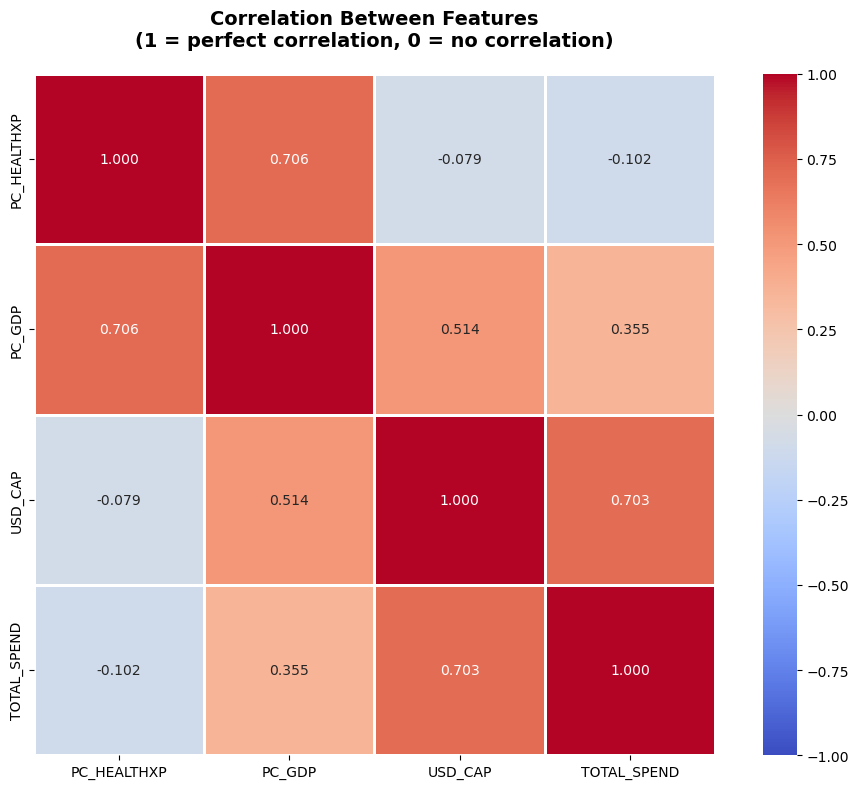


STEP 2 COMPLETED

How to Read the Results:
------------------------
- Values close to 1: Features are very similar (redundant)
- Values close to 0: Features are independent (unique information)
- Values close to -1: Features are opposite

Rule of Thumb:
- Correlation > 0.7: Consider removing one feature (too similar)
- Correlation < 0.7: Keep both features (different enough)



In [5]:
# 2.3 Visualize with heatmap
print("\n2.3 Creating Correlation Heatmap...")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, 
            annot=True,           # Show numbers
            fmt='.3f',            # 3 decimal places
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colors at 0
            square=True,          # Square cells
            linewidths=2,         # Lines between cells
            vmin=-1, vmax=1)      # Scale from -1 to 1

plt.title('Correlation Between Features\n(1 = perfect correlation, 0 = no correlation)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("STEP 2 COMPLETED")
print("="*70)

print("""
How to Read the Results:
------------------------
- Values close to 1: Features are very similar (redundant)
- Values close to 0: Features are independent (unique information)
- Values close to -1: Features are opposite

Rule of Thumb:
- Correlation > 0.7: Consider removing one feature (too similar)
- Correlation < 0.7: Keep both features (different enough)
""")

### Correlation Matrix

**Key Findings:**

1. **PC_HEALTHXP ↔ PC_GDP: 0.706 **
   - Strong positive correlation (just above 0.7 threshold)
   - When health spending as % of GDP increases, pharma % also tends to increase
   - Borderline - some overlap but still acceptable

2. **USD_CAP ↔ TOTAL_SPEND: 0.703 **
   - Strong positive correlation (just above 0.7 threshold)
   - Countries with high per capita spending also have high total spending
   - Makes sense: Bigger/richer countries spend more both per person and in total
   - Potential redundancy - these two might provide similar information

3. **Low/Negative Correlations: ✅**
   - PC_HEALTHXP ↔ USD_CAP: -0.079 (nearly independent)
   - PC_HEALTHXP ↔ TOTAL_SPEND: -0.102 (nearly independent)
   - PC_GDP ↔ USD_CAP: 0.514 (moderate, acceptable)
   - PC_GDP ↔ TOTAL_SPEND: 0.355 (weak, acceptable)

**Decision Point:**
The only concerning pair: USD_CAP ↔ TOTAL_SPEND (0.703)

**Question:** Are these two features redundant?

**Options:**
✅ **Drop TOTAL_SPEND (keep USD_CAP)**
- USD_CAP is in our research question explicitly
- USD_CAP is population-adjusted (fairer comparison)
- TOTAL_SPEND is biased by country size

⚠️ **Keep both**
- 0.703 is borderline (not extremely high like 0.9+)
- TOTAL_SPEND adds "market size" information
- But adds complexity

**Recommendation:**
**DROP TOTAL_SPEND, KEEP 3 FEATURES:**
✅ PC_HEALTHXP (essential - in research question)
✅ PC_GDP (essential - in research question)
✅ USD_CAP (essential - in research question)
❌ TOTAL_SPEND (redundant with USD_CAP at 0.703)

**Benefit:** Simpler, focused on research question, eliminates redundancy.

-----

#### Drop TOTAL_SPEND Feature
**Description:**

Based on the correlation analysis showing USD_CAP ↔ TOTAL_SPEND = 0.703, we drop TOTAL_SPEND to eliminate redundancy and focus on the three features explicitly mentioned in the research question.


In [6]:
# Feature Selection Decision - Drop TOTAL_SPEND
# =======================================================

print("\n" + "="*70)
print("FEATURE SELECTION DECISION")
print("="*70)

# Apply Feature Selection
print("\n2B.3 Applying Feature Selection...")

print(f"\nBefore: {df.shape[1]} columns")
print(f"  Columns: {list(df.columns)}")

# Create new dataframe without TOTAL_SPEND
df_selected = df[['COUNTRY', 'YEAR', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']].copy()

print(f"\nAfter: {df_selected.shape[1]} columns")
print(f"  Columns: {list(df_selected.columns)}")

print(f"\n✓ TOTAL_SPEND dropped")
print(f"✓ Dataset reduced from {df.shape[1]} to {df_selected.shape[1]} columns")



FEATURE SELECTION DECISION

2B.3 Applying Feature Selection...

Before: 6 columns
  Columns: ['COUNTRY', 'YEAR', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']

After: 5 columns
  Columns: ['COUNTRY', 'YEAR', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

✓ TOTAL_SPEND dropped
✓ Dataset reduced from 6 to 5 columns


In [7]:

# 2B.4 Verify selected dataset
print("\n2B.4 Selected Dataset Verification:")
print(f"  Shape: {df_selected.shape}")
print(f"  Countries: {df_selected['COUNTRY'].nunique()}")
print(f"  Years: {df_selected['YEAR'].min()}-{df_selected['YEAR'].max()}")



2B.4 Selected Dataset Verification:
  Shape: (360, 5)
  Countries: 36
  Years: 2011-2020


### Step 3 | Calculate Growth Rates
**Description:**

Calculate the annual growth rate for each of the 3 selected features (PC_HEALTHXP, PC_GDP, USD_CAP) for each country over the 2011-2020 period.

In [8]:
# Step 3A: Calculate Growth Rates
# ================================

print("\n" + "="*70)
print("STEP 3A: CALCULATE GROWTH RATES")
print("="*70)

# 3A.1 Define selected features
selected_features = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

print("\n3A.1 Features to calculate growth rates for:")
print(f"  {selected_features}")

# 3A.2 Calculate growth rate for each country
print("\n3A.2 Calculating annual growth rates...")

growth_rates = []

for country in df['COUNTRY'].unique():
    # Get data for this country, sorted by year
    country_data = df[df['COUNTRY'] == country].sort_values('YEAR')
    
    # Get first year (2011) and last year (2020)
    first_year = country_data.iloc[0]
    last_year = country_data.iloc[-1]
    
    # Calculate number of years
    years_diff = last_year['YEAR'] - first_year['YEAR']
    
    # Store country name
    country_growth = {'COUNTRY': country}
    
    # Calculate growth for each feature
    for feature in selected_features:
        start_value = first_year[feature]
        end_value = last_year[feature]
        
        # Calculate compound annual growth rate (CAGR)
        if start_value > 0:
            growth_rate = ((end_value / start_value) ** (1 / years_diff) - 1) * 100
        else:
            growth_rate = 0
        
        country_growth[f'{feature}_growth'] = growth_rate
    
    growth_rates.append(country_growth)

# Create dataframe
growth_df = pd.DataFrame(growth_rates)

print(f"✓ Growth rates calculated for {len(growth_df)} countries")

# 3A.3 Display results
print("\n3A.3 Growth Rates Results:")
print(f"\nColumns: {list(growth_df.columns)}")
print(f"\nFirst 10 countries:")
print(growth_df.head(10))

print(f"\nStatistical Summary:")
print(growth_df.describe())

print("\n" + "="*70)
print("STEP 3A COMPLETED: Growth Rates Calculated")
print("="*70)


STEP 3A: CALCULATE GROWTH RATES

3A.1 Features to calculate growth rates for:
  ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

3A.2 Calculating annual growth rates...
✓ Growth rates calculated for 36 countries

3A.3 Growth Rates Results:

Columns: ['COUNTRY', 'PC_HEALTHXP_growth', 'PC_GDP_growth', 'USD_CAP_growth']

First 10 countries:
  COUNTRY  PC_HEALTHXP_growth  PC_GDP_growth  USD_CAP_growth
0     AUS           -2.706264      -0.249001        1.734883
1     AUT           -0.145484       1.276625        3.235784
2     BEL           -2.163902      -1.320608        1.227562
3     CAN           -2.514451      -0.011966        1.150380
4     CHE            0.553733       2.304422        3.902980
5     CRI           -6.418785      -6.784737       -3.044644
6     CYP           -1.341332       1.632757        3.529215
7     CZE           -2.737907      -0.576563        3.220690
8     DEU           -0.510362       1.314052        4.235139
9     DNK           -1.784796      -1.602761        1.423713

### What This Step Does:
1. Confirms the 3 selected features
2. Calculates annual growth rates (CAGR) for each feature ✅
3. Calculates decade averages (mean 2011-2020)
4. Calculates volatility (standard deviation)
5. Combines all into one dataset
6. Displays the engineered features

### Step 3B: Calculate Decade Averages
**Description:**

Calculate the average (mean) value for each of the 3 selected features over the entire 2011-2020 period for each country.

In [ ]:
# Calculate Decade Averages
# ===================================

print("\n" + "="*70)
print("STEP 3B: CALCULATE DECADE AVERAGES")
print("="*70)

#selected_features = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

# Calculate mean for each country
print("\n3B.1 Calculating average values (2011-2020)...")
# Group by country and calculate mean
averages = df.groupby('COUNTRY')[selected_features].mean().reset_index()

averages.head()


STEP 3B: CALCULATE DECADE AVERAGES

3B.1 Calculating average values (2011-2020)...


,COUNTRY,PC_HEALTHXP,PC_GDP,USD_CAP
0,AUS,13.1034,1.2641,611.4605
1,AUT,12.0644,1.2571,615.2524
2,BEL,12.0686,1.2934,582.9294
3,CAN,16.4811,1.7931,799.7810
4,CHE,10.4399,1.1219,649.7471


In [15]:
# Rename columns to indicate these are averages
averages.columns = ['COUNTRY'] + [f'{col}_avg' for col in selected_features]

print(f"✓ Averages calculated for {len(averages)} countries")

# Display results
print("\n Decade Averages Results:")
print(f"\nColumns: {list(averages.columns)}")

print(f"\nFirst 10 countries:")
print(averages.head(10))

print(f"\nStatistical Summary:")
print(averages.describe())

print("\n" + "="*70)
print("STEP 3B COMPLETED: Decade Averages Calculated")
print("="*70)

✓ Averages calculated for 36 countries

 Decade Averages Results:

Columns: ['COUNTRY', 'PC_HEALTHXP_avg', 'PC_GDP_avg', 'USD_CAP_avg']

First 10 countries:
  COUNTRY  PC_HEALTHXP_avg  PC_GDP_avg  USD_CAP_avg
0     AUS          13.1034      1.2641     611.4605
1     AUT          12.0644      1.2571     615.2524
2     BEL          12.0686      1.2934     582.9294
3     CAN          16.4811      1.7931     799.7810
4     CHE          10.4399      1.1219     649.7471
5     CRI          12.0081      0.9121     163.3874
6     CYP          16.8244      1.1594     391.0614
7     CZE          17.6841      1.3542     489.1412
8     DEU          14.1351      1.6008     790.7068
9     DNK           6.7874      0.6992     330.5741

Statistical Summary:
       PC_HEALTHXP_avg  PC_GDP_avg  USD_CAP_avg
count        36.000000   36.000000    36.000000
mean         16.828475    1.382739   525.024358
std           6.475931    0.413637   181.177546
min           6.787400    0.600600   163.387400
25%      

### Step 3C: Calculate Volatility (Standard Deviation)
**Description:**

Calculate the standard deviation for each of the 3 selected features over the 2011-2020 period for each country. This measures how stable or volatile each country's spending is.

In [16]:
# Calculate Volatility
# ==============================

print("\n" + "="*70)
print("STEP 3C: CALCULATE VOLATILITY (STABILITY)")
print("="*70)

# Calculate standard deviation for each country
print("\n3C.1 Calculating volatility (standard deviation)...")

# Group by country and calculate standard deviation
volatility = df.groupby('COUNTRY')[selected_features].std().reset_index()

# Rename columns to indicate these are volatility metrics
volatility.columns = ['COUNTRY'] + [f'{col}_volatility' for col in selected_features]

print(f"✓ Volatility metrics calculated for {len(volatility)} countries")



STEP 3C: CALCULATE VOLATILITY (STABILITY)

3C.1 Calculating volatility (standard deviation)...
✓ Volatility metrics calculated for 36 countries


In [17]:
# Display results
print("\n Volatility Results:")
print(f"\nColumns: {list(volatility.columns)}")

print(f"\nFirst 10 countries:")
print(volatility.head(10))

print(f"\nStatistical Summary:")
print(volatility.describe())

print("""
Interpretation:
- Low volatility = Stable, predictable market
- High volatility = Unstable, unpredictable market
""")

print("\n" + "="*70)
print("STEP 3C COMPLETED: Volatility Calculated")
print("="*70)


 Volatility Results:

Columns: ['COUNTRY', 'PC_HEALTHXP_volatility', 'PC_GDP_volatility', 'USD_CAP_volatility']

First 10 countries:
  COUNTRY  PC_HEALTHXP_volatility  PC_GDP_volatility  USD_CAP_volatility
0     AUS                1.357888           0.040281           34.194026
1     AUT                0.156731           0.046143           55.772536
2     BEL                0.782231           0.060504           27.408525
3     CAN                1.008083           0.052830           43.787059
4     CHE                0.229655           0.073386           71.147415
5     CRI                3.010122           0.251062           29.892974
6     CYP                1.489538           0.080064           58.289677
7     CZE                1.566783           0.106328           42.426044
8     DEU                0.272074           0.058575          102.023283
9     DNK                0.386864           0.046368           20.135924

Statistical Summary:
       PC_HEALTHXP_volatility  PC_GDP_vol

### Step 3D: Merge All Engineered Features
**Description:**

Combine all the engineered features (growth rates, averages, and volatility) into a single country-level dataset ready for clustering analysis.

In [18]:
# Step 3D: Merge All Engineered Features
# =======================================

print("\n" + "="*70)
print("STEP 3D: MERGE ALL ENGINEERED FEATURES")
print("="*70)

# 3D.1 Merge all features together
print("\n3D.1 Combining all engineered features...")

# Start with growth rates
engineered_df = growth_df.copy()
print(f"  Starting with growth rates: {engineered_df.shape}")

# Merge averages
engineered_df = engineered_df.merge(averages, on='COUNTRY', how='inner')
print(f"  After merging averages: {engineered_df.shape}")

# Merge volatility
engineered_df = engineered_df.merge(volatility, on='COUNTRY', how='inner')
print(f"  After merging volatility: {engineered_df.shape}")

print(f"\n✓ All features merged successfully")




STEP 3D: MERGE ALL ENGINEERED FEATURES

3D.1 Combining all engineered features...
  Starting with growth rates: (36, 4)
  After merging averages: (36, 7)
  After merging volatility: (36, 10)

✓ All features merged successfully


In [19]:
#  Verify dataset structure
print("\n Final Dataset Structure:")
print(f"  Shape: {engineered_df.shape}")
print(f"  Countries: {len(engineered_df)}")
print(f"  Features: {engineered_df.shape[1] - 1} (excluding COUNTRY)")

print(f"\n  Column names:")
for i, col in enumerate(engineered_df.columns, 1):
    print(f"    {i}. {col}")

# 3D.3 Display sample data
print("\n3D.3 Sample of Engineered Dataset:")
print(f"\nFirst 5 countries:")
print(engineered_df.head())

print(f"\nLast 5 countries:")
print(engineered_df.tail())

print(f"\nRandom sample (3 countries):")
print(engineered_df.sample(3, random_state=42))

# 3D.4 Statistical summary
print("\n3D.4 Statistical Summary of All Features:")
print(engineered_df.describe())

# 3D.5 Check for any issues
print("\n3D.5 Data Quality Check:")
missing = engineered_df.isnull().sum().sum()
print(f"  Missing values: {missing}")
if missing == 0:
    print("  ✓ No missing values - dataset is complete")
else:
    print(f"  ⚠️  {missing} missing values detected")

print("\n" + "="*70)
print("STEP 3D COMPLETED: All Features Merged")
print("="*70)

print(f"""
Final Engineered Dataset Summary:
----------------------------------
Countries: {len(engineered_df)}
Features per country: {engineered_df.shape[1] - 1}

Feature Categories:
  - Growth Rates (3): Trend analysis
  - Averages (3): Spending levels
  - Volatility (3): Market stability

Total: 9 engineered features

Dataset is ready for:
  ✓ Derived ratio calculations (optional)
  ✓ Feature scaling
  ✓ Clustering analysis

Next Step: Create derived ratios (pharma intensity, etc.)
""")


 Final Dataset Structure:
  Shape: (36, 10)
  Countries: 36
  Features: 9 (excluding COUNTRY)

  Column names:
    1. COUNTRY
    2. PC_HEALTHXP_growth
    3. PC_GDP_growth
    4. USD_CAP_growth
    5. PC_HEALTHXP_avg
    6. PC_GDP_avg
    7. USD_CAP_avg
    8. PC_HEALTHXP_volatility
    9. PC_GDP_volatility
    10. USD_CAP_volatility

3D.3 Sample of Engineered Dataset:

First 5 countries:
  COUNTRY  PC_HEALTHXP_growth  PC_GDP_growth  USD_CAP_growth  PC_HEALTHXP_avg  \
0     AUS           -2.706264      -0.249001        1.734883          13.1034   
1     AUT           -0.145484       1.276625        3.235784          12.0644   
2     BEL           -2.163902      -1.320608        1.227562          12.0686   
3     CAN           -2.514451      -0.011966        1.150380          16.4811   
4     CHE            0.553733       2.304422        3.902980          10.4399   

   PC_GDP_avg  USD_CAP_avg  PC_HEALTHXP_volatility  PC_GDP_volatility  \
0      1.2641     611.4605                1.35

### Save Engineered Dataset
**Description:**

Save the engineered dataset (36 countries × 9 features) to a CSV file for use in clustering analysis.

In [12]:
# Step 3E: Save Engineered Dataset
# =================================

print("\n" + "="*70)
print("STEP 3E: SAVE ENGINEERED DATASET")
print("="*70)

# Prepare output file path
output_path = '../Data/processing/engineered_features.csv'
engineered_df.to_csv(output_path, index=False)
print(f"✓ Dataset saved successfully")



STEP 3E: SAVE ENGINEERED DATASET
✓ Dataset saved successfully
